# Unsupervised Learning Algorithms - ClimateWins EDA 2.1.1

### This script contains the following:
#### 1. Import Libraries and Data
#### 2. Merge Data Sets
#### 3. Reduce Data to Previous Decade
#### 4. Perform EDA and Cleaning
#### 5. Export Data

### 1. Import Libraries and Data

In [1]:
# Import libraries and additional requirements
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

# Supress scientific notation for easier analysis profiling
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
# Create a path for faster data importation
path = r'C:\Users\kenzy\OneDrive\Desktop\Data Analytics Course 2.0\Basics of Machine Learning for Analysts\10-2024 ClimateWins'
prediction= pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))
# confirm import
prediction.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1                  7              2.10            0.85   
1  19600102      1                  6              2.10            0.84   
2  19600103      1                  8              2.10            0.90   
3  19600104      1                  3              2.10            0.92   
4  19600105      1                  6              2.10            0.95   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0            1.02                    0.32                 0.09   
1            1.02                    0.36                 1.05   
2            1.02                    0.18                 0.30   
3            1.02                    0.58                 0.00   
4            1.02                    0.65                 0.14   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0                 0            0.70  ...                     5   
1                 0            1.10  ...                     7   
2                 0            0.00  ...                     7   
3                 0            4.10  ...                     7   
4                 0            5.40  ...                     3   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.88               1.00                       0.45   
1               0.91               1.00                       0.25   
2               0.91               1.01                       0.17   
3               0.86               1.02                       0.13   
4               0.80               1.03                       0.46   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                    0.34                    0               4.70   
1                    0.84                    0               0.70   
2                    0.08                    0               0.10   
3                    0.98                    0               0.00   
4                    0.00                    0               5.70   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                8.50               6.00              10.90  
1                8.90               5.60              12.10  
2               10.50               8.10              12.90  
3                7.40               7.30              10.60  
4                5.70               3.00               8.40  

[5 rows x 170 columns]

In [6]:
prediction.describe

<bound method NDFrame.describe of            DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0      19600101      1                  7              2.10            0.85   
1      19600102      1                  6              2.10            0.84   
2      19600103      1                  8              2.10            0.90   
3      19600104      1                  3              2.10            0.92   
4      19600105      1                  6              2.10            0.95   
...         ...    ...                ...               ...             ...   
22945  20221027     10                  1              2.10            0.79   
22946  20221028     10                  6              2.10            0.77   
22947  20221029     10                  4              2.10            0.76   
22948  20221030     10                  5              2.10            0.80   
22949  20221031     10                  5              2.10            0.84   

       BASEL_pres

In [4]:
# import second data set
pleasant= pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
# confirm import
pleasant.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [5]:
pleasant.describe

<bound method NDFrame.describe of            DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1  

### 2. Merge Data Sets

In [7]:
# Using inner join, merge both data sets (using date)
df= prediction.merge(pleasant, on='DATE')

In [10]:
# Check merge
df

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0      19600101      1                  7              2.10            0.85   
1      19600102      1                  6              2.10            0.84   
2      19600103      1                  8              2.10            0.90   
3      19600104      1                  3              2.10            0.92   
4      19600105      1                  6              2.10            0.95   
...         ...    ...                ...               ...             ...   
22945  20221027     10                  1              2.10            0.79   
22946  20221028     10                  6              2.10            0.77   
22947  20221029     10                  4              2.10            0.76   
22948  20221030     10                  5              2.10            0.80   
22949  20221031     10                  5              2.10            0.84   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0                1.02                    0.32                 0.09   
1                1.02                    0.36                 1.05   
2                1.02                    0.18                 0.30   
3                1.02                    0.58                 0.00   
4                1.02                    0.65                 0.14   
...               ...                     ...                  ...   
22945            1.02                    1.34                 0.22   
22946            1.02                    1.34                 0.22   
22947            1.02                    1.34                 0.22   
22948            1.02                    1.34                 0.22   
22949            1.02                    1.34                 0.22   

       BASEL_snow_depth  BASEL_sunshine  ...  HEATHROW_pleasant_weather  \
0                     0            0.70  ...                          0   
1                     0            1.10  ...                          0   
2                     0            0.00  ...                          0   
3                     0            4.10  ...                          0   
4                     0            5.40  ...                          0   
...                 ...             ...  ...                        ...   
22945                 0            7.70  ...                          0   
22946                 0            5.40  ...                          0   
22947                 0            6.10  ...                          0   
22948                 0            5.80  ...                          0   
22949                 0            3.20  ...                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947   

### 3. Reduce Data to Previous Decade

In [9]:
# Check data types
df.dtypes

DATE                            int64
MONTH                           int64
BASEL_cloud_cover               int64
BASEL_wind_speed              float64
BASEL_humidity                float64
                               ...   
MUNCHENB_pleasant_weather       int64
OSLO_pleasant_weather           int64
SONNBLICK_pleasant_weather      int64
STOCKHOLM_pleasant_weather      int64
VALENTIA_pleasant_weather       int64
Length: 185, dtype: object

In [24]:
# Convert 'DATE' column to datetime type
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
# Filter the DataFrame
df_filtered = df[(df['DATE'] >= '2012-01-01') & (df['DATE'] <= '2022-12-31')]

# Print the filtered DataFrame
df_filtered
# Now df_filtered should only contain data from the previous decade 2012-2022

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
18993 2012-01-01      1                  8              1.90            0.79   
18994 2012-01-02      1                  8              3.10            0.87   
18995 2012-01-03      1                  5              3.10            0.72   
18996 2012-01-04      1                  5              5.10            0.70   
18997 2012-01-05      1                  7              7.80            0.73   
...          ...    ...                ...               ...             ...   
22945 2022-10-27     10                  1              2.10            0.79   
22946 2022-10-28     10                  6              2.10            0.77   
22947 2022-10-29     10                  4              2.10            0.76   
22948 2022-10-30     10                  5              2.10            0.80   
22949 2022-10-31     10                  5              2.10            0.84   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
18993            1.02                    0.32                 0.00   
18994            1.02                    0.18                 0.75   
18995            1.02                    0.53                 0.70   
18996            1.02                    0.45                 0.09   
18997            1.01                    0.26                 1.12   
...               ...                     ...                  ...   
22945            1.02                    1.34                 0.22   
22946            1.02                    1.34                 0.22   
22947            1.02                    1.34                 0.22   
22948            1.02                    1.34                 0.22   
22949            1.02                    1.34                 0.22   

       BASEL_snow_depth  BASEL_sunshine  ...  HEATHROW_pleasant_weather  \
18993                 0            0.00  ...                          0   
18994                 0            0.00  ...                          0   
18995                 0            3.40  ...                          0   
18996                 0            2.90  ...                          0   
18997                 0            0.30  ...                          0   
...                 ...             ...  ...                        ...   
22945                 0            7.70  ...                          0   
22946                 0            5.40  ...                          0   
22947                 0            6.10  ...                          0   
22948                 0            5.80  ...                          0   
22949                 0            3.20  ...                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18993                        0                           0   
18994                        0                           0   
18995                        0                           0   
18996                        0                           0   
18997                        0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18993                            0                        0   
18994                            0                        0   
18995                            0                        0   
18996                            0                        0   
18997                            0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0 

In [14]:
df_filtered.shape

(3957, 185)

In [32]:
df.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed',
       'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation',
       'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine',
       ...
       'HEATHROW_pleasant_weather', 'KASSEL_pleasant_weather',
       'LJUBLJANA_pleasant_weather', 'MAASTRICHT_pleasant_weather',
       'MADRID_pleasant_weather', 'MUNCHENB_pleasant_weather',
       'OSLO_pleasant_weather', 'SONNBLICK_pleasant_weather',
       'STOCKHOLM_pleasant_weather', 'VALENTIA_pleasant_weather'],
      dtype='object', length=185)

### Perform EDA and Cleaning

In [15]:
# The month column seems unnecessary as it is contained in the DATE column, lets drop it
df_filtered2 = df_filtered.drop(columns=['MONTH'], axis = 1)

In [16]:
df_filtered2.head()

DATE  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
18993 2012-01-01                  8              1.90            0.79   
18994 2012-01-02                  8              3.10            0.87   
18995 2012-01-03                  5              3.10            0.72   
18996 2012-01-04                  5              5.10            0.70   
18997 2012-01-05                  7              7.80            0.73   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
18993            1.02                    0.32                 0.00   
18994            1.02                    0.18                 0.75   
18995            1.02                    0.53                 0.70   
18996            1.02                    0.45                 0.09   
18997            1.01                    0.26                 1.12   

       BASEL_snow_depth  BASEL_sunshine  BASEL_temp_mean  ...  \
18993                 0            0.00            11.40  ...   
18994                 0            0.00             7.30  ...   
18995                 0            3.40             7.20  ...   
18996                 0            2.90             6.90  ...   
18997                 0            0.30             6.80  ...   

       HEATHROW_pleasant_weather  KASSEL_pleasant_weather  \
18993                          0                        0   
18994                          0                        0   
18995                          0                        0   
18996                          0                        0   
18997                          0                        0   

       LJUBLJANA_pleasant_weather  MAASTRICHT_pleasant_weather  \
18993                           0                            0   
18994                           0                            0   
18995                           0                            0   
18996                           0                            0   
18997                           0                            0   

       MADRID_pleasant_weather  MUNCHENB_pleasant_weather  \
18993                        0                          0   
18994                        0                          0   
18995                        0                          0   
18996                        0                          0   
18997                        0                          0   

       OSLO_pleasant_weather  SONNBLICK_pleasant_weather  \
18993                      0                           0   
18994                      0                           0   
18995                      0                           0   
18996                      0                           0   
18997                      0                           0   

       STOCKHOLM_pleasant_weather  VALENTIA_pleasant_weather  
18993                           0                          0  
18994                           0                          0  
18995                           0                          0  
18996                           0                          0  
18997                           0                          0  

[5 rows x 184 columns]

In [18]:
# Check for missing values in the entire DataFrame
missing_values = df_filtered2.isnull().sum().sum()
print(f"Total missing values: {missing_values}")

Total missing values: 0


In [19]:
df_filtered2.describe

<bound method NDFrame.describe of             DATE  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
18993 2012-01-01                  8              1.90            0.79   
18994 2012-01-02                  8              3.10            0.87   
18995 2012-01-03                  5              3.10            0.72   
18996 2012-01-04                  5              5.10            0.70   
18997 2012-01-05                  7              7.80            0.73   
...          ...                ...               ...             ...   
22945 2022-10-27                  1              2.10            0.79   
22946 2022-10-28                  6              2.10            0.77   
22947 2022-10-29                  4              2.10            0.76   
22948 2022-10-30                  5              2.10            0.80   
22949 2022-10-31                  5              2.10            0.84   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
18993            1.

In [26]:
# Calculate the sum of pleasant weather days in the last decade
# Get a list of pleasant weather columns
pleasant_weather_cols = [col for col in df_filtered2.columns if col.endswith('_pleasant_weather')]

# Calculate the sum of pleasant weather days for each column
pleasant_days_count = df_filtered2[pleasant_weather_cols].sum()

# 5. Print the results
print("Pleasant weather days over the last decade:\n", pleasant_days_count)

Pleasant weather days over the last decade:
 BASEL_pleasant_weather         1098
BELGRADE_pleasant_weather      1488
BUDAPEST_pleasant_weather      1212
DEBILT_pleasant_weather         902
DUSSELDORF_pleasant_weather     966
HEATHROW_pleasant_weather       960
KASSEL_pleasant_weather         152
LJUBLJANA_pleasant_weather     1201
MAASTRICHT_pleasant_weather     982
MADRID_pleasant_weather        1914
MUNCHENB_pleasant_weather       968
OSLO_pleasant_weather           640
SONNBLICK_pleasant_weather        0
STOCKHOLM_pleasant_weather      810
VALENTIA_pleasant_weather         0
dtype: int64


In [39]:
# Over the entire data
pleasant_weather_cols = [col for col in df.columns if col.endswith('_pleasant_weather')]

# Calculate the sum of pleasant weather days for each column
pleasant_days_count = df[pleasant_weather_cols].sum()

#  Print the results
print("Pleasant weather days over entire data:\n", pleasant_days_count)

Pleasant weather days over entire data:
 BASEL_pleasant_weather          5664
BELGRADE_pleasant_weather       7992
BUDAPEST_pleasant_weather       7431
DEBILT_pleasant_weather         4459
DUSSELDORF_pleasant_weather     4934
HEATHROW_pleasant_weather       4959
KASSEL_pleasant_weather         3774
LJUBLJANA_pleasant_weather      6376
MAASTRICHT_pleasant_weather     4766
MADRID_pleasant_weather        10247
MUNCHENB_pleasant_weather       4767
OSLO_pleasant_weather           3579
SONNBLICK_pleasant_weather         0
STOCKHOLM_pleasant_weather      3894
VALENTIA_pleasant_weather       1174
dtype: int64


In [46]:
# Create a scatterplot of mean temps vs pleasant weather days (3 cities selected)

plt.figure(figsize=(8, 6))

# Plot each weather station separately
plt.scatter(df['VALENTIA_temp_mean'], df['VALENTIA_pleasant_weather'], label='VALENTIA', color ='gold')
plt.scatter(df['MADRID_temp_mean'], df['MADRID_pleasant_weather'], label='MADRID', color= 'plum')
plt.scatter(df['HEATHROW_temp_mean'], df['HEATHROW_pleasant_weather'], label='HEATHROW', color = 'palevioletred')

plt.xlabel('Temperature Mean')
plt.ylabel('Pleasant Weather (Yes or No)')
plt.title('Scatter Plot of 3 Weather Stations Temperature Means vs Pleasant Weather')
plt.legend()  # Add a legend to distinguish the stations


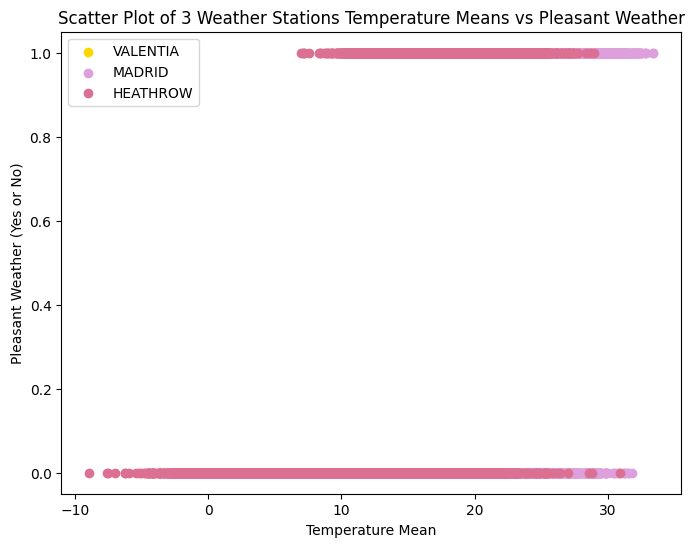

In [47]:
# Save the figure, show the figure
plt.savefig(os.path.join(path, '04 Visualizations', 'Temp_vs_Mean_3_Cities.png'))
plt.show()

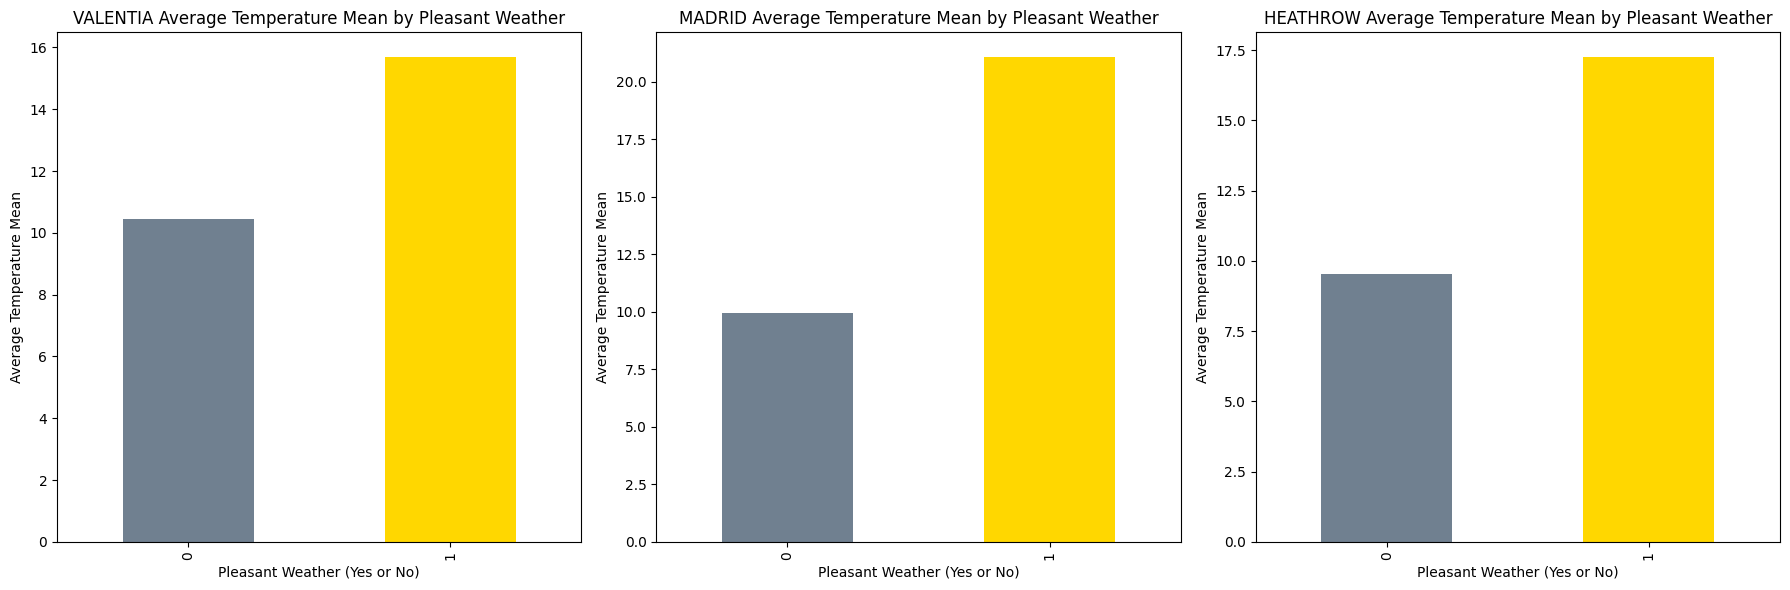

In [43]:
# Calculate the average temperature mean for each category of pleasant weather
# Create a figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns for the subplots

cities = ['VALENTIA', 'MADRID', 'HEATHROW']
colors = ['slategrey', 'gold']  # Assuming slate grey for 'No' and gold for 'Yes'

for i, city in enumerate(cities):
    # Group by pleasant weather and calculate mean temperature for the current city
    mean_temp_by_weather = df.groupby(f'{city}_pleasant_weather')[f'{city}_temp_mean'].mean()

    # Plot the bar chart on the corresponding subplot
    mean_temp_by_weather.plot(kind='bar', color=colors, ax=axes[i])
    axes[i].set_xlabel('Pleasant Weather (Yes or No)')
    axes[i].set_ylabel('Average Temperature Mean')
    axes[i].set_title(f'{city} Average Temperature Mean by Pleasant Weather')

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(path, '04 Visualizations', 'AVG_Temp_BY_Mean_3_Cities.png'))

# Display the plot
plt.show()

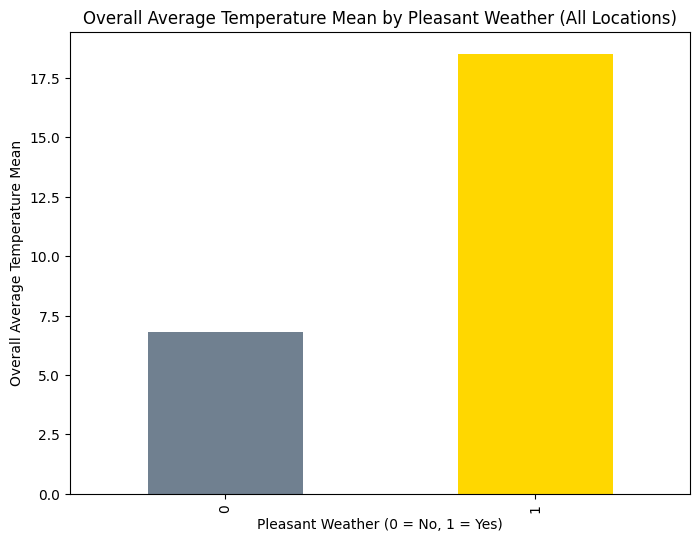

In [44]:
# Over the entire data
pleasant_weather_cols = [col for col in df.columns if col.endswith('_pleasant_weather')]

# Get a list of all pleasant weather columns
pleasant_weather_cols = [col for col in df.columns if col.endswith('_pleasant_weather')]

# Create an empty dictionary to store the results
overall_mean_temp = {}

# Loop through pleasant weather categories (0 and 1)
for pleasant_weather in [0, 1]:
    all_temps = []
    for col in pleasant_weather_cols:
        # Filter data for the current pleasant weather category in the current column
        filtered_df = df[df[col] == pleasant_weather]
        
        # Extract the corresponding temperature column name
        temp_col = col.replace('_pleasant_weather', '_temp_mean')  
        
        # Get the temperature values for the filtered data
        temps = filtered_df[temp_col].values
        all_temps.extend(temps)

    # Calculate the overall average temperature for the current category
    overall_mean_temp[pleasant_weather] = np.mean(all_temps)

# Convert the dictionary to a Series for easier plotting
overall_mean_temp_series = pd.Series(overall_mean_temp)

# Plot the bar chart
plt.figure(figsize=(8, 6))
overall_mean_temp_series.plot(kind='bar', color=['slategrey', 'gold'])
plt.xlabel('Pleasant Weather (0 = No, 1 = Yes)')
plt.ylabel('Overall Average Temperature Mean')
plt.title('Overall Average Temperature Mean by Pleasant Weather (All Locations)')

# Save the figure
plt.savefig(os.path.join(path, '04 Visualizations', 'Overall_Temp_vs_Mean_All_Locations.png'))

plt.show()

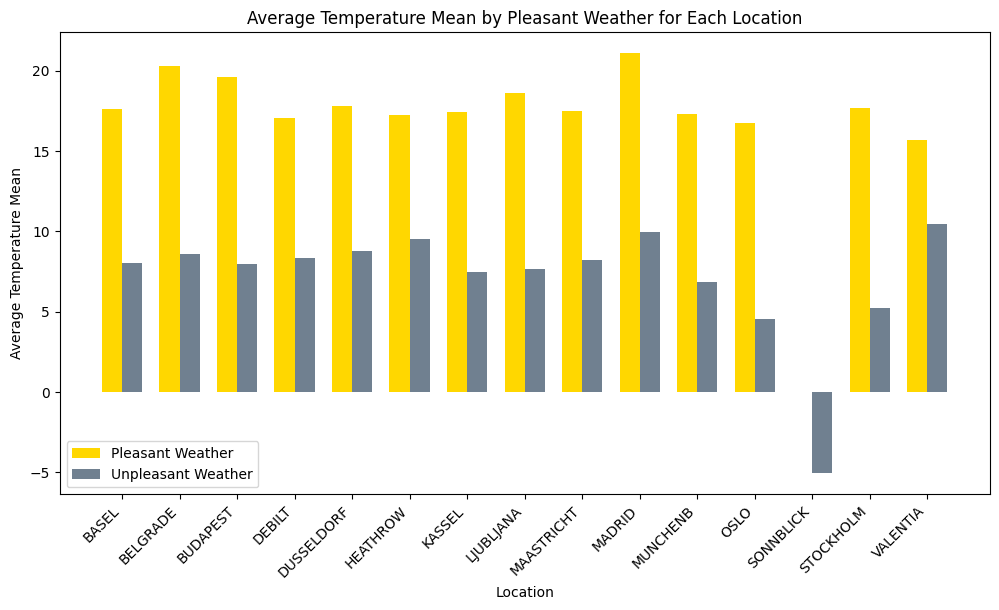

In [45]:

# Get lists of pleasant weather and temperature columns
pleasant_weather_cols = [col for col in df.columns if col.endswith('_pleasant_weather')]
temp_mean_cols = [col.replace('_pleasant_weather', '_temp_mean') for col in pleasant_weather_cols]

# Create lists to store results
locations = []
pleasant_weather_means = []
unpleasant_weather_means = []

# Loop through each location
for pleasant_col, temp_col in zip(pleasant_weather_cols, temp_mean_cols):
    location_name = pleasant_col.split('_')[0]  # Extract location name from column

    # Calculate mean temperature for each pleasant weather category
    pleasant_mean = df[df[pleasant_col] == 1][temp_col].mean()
    unpleasant_mean = df[df[pleasant_col] == 0][temp_col].mean()

    locations.append(location_name)
    pleasant_weather_means.append(pleasant_mean)
    unpleasant_weather_means.append(unpleasant_mean)

# Create the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(locations))

plt.bar(index, pleasant_weather_means, bar_width, label='Pleasant Weather', color='gold')
plt.bar(index + bar_width, unpleasant_weather_means, bar_width, label='Unpleasant Weather', color='slategrey')

plt.xlabel('Location')
plt.ylabel('Average Temperature Mean')
plt.title('Average Temperature Mean by Pleasant Weather for Each Location')
plt.xticks(index + bar_width / 2, locations, rotation=45, ha='right')  # Center x-axis labels
plt.legend()

# Save the figure
plt.savefig(os.path.join(path, '04 Visualizations', 'Temp_vs_Mean_All_Locations.png'))

plt.show()

### 5. Export Data

In [22]:
df_filtered2.to_csv(os.path.join(path, '02 Data', 'Unsupervised', 'Previous_Decade_Weather_Data.csv'), index = False)